In [61]:
import numpy as np
import pandas as pd
import copy
import seaborn as sb
import matplotlib.pyplot as plt
import re

In [2]:
raw_data = pd.read_csv('../data/ODI-2020.csv', sep=';')
restore_data = raw_data.copy()

In [3]:
print(raw_data)

What programme are you in?  \
0           Computational Science   
1    Quantitative Risk Management   
2       MSc Computational Science   
3              MSc Finance - QRM    
4                              BA   
..                            ...   
275       Mechenaical Engineering   
276                            CS   
277       Artificial Intelligence   
278       Artificial Intelligence   
279       Artificial Intelligence   

    Have you taken a course on machine learning?  \
0                                             no   
1                                             no   
2                                             no   
3                                             no   
4                                            yes   
..                                           ...   
275                                          yes   
276                                           no   
277                                          yes   
278                                       

In [47]:
raw_data.columns = ['prog', 'ml','ir', 'stat', 'db', 'gender', 'choco', 'birthday', 'nNeigh', 'standup', 'stress', 'dm', 'rand', 'bed', 'gd1', 'gd2']
restore_data.columns = raw_data.columns

In [99]:
# filter needed
# program
prog_mapping = {'phy':'Physics', 'ai':'Artificial Intelligence', 'arti': 'Artificial Intelligence', 'finan':'Finance', 'eng':'Engineer', 'cs':"Computer Science", 'uter scie':"Computer Science", 'ba':"Business", 'business':'Business','econ':'Economy','bioinfo':'Bioinfomatics', 'risk':'QRM', 'comput':'Computational Science', 'bio':"Biology", 'qrm':"QRM", 'information':"Information Science"}
default = lambda x: x[0] if len(x) else 'Others'
raw_data['prog'] = restore_data['prog'].map(lambda x: default([prog_mapping[key] for key in prog_mapping.keys() if key in x.lower()]))
print(raw_data['prog'])

0        Computational Science
1              Risk Management
2        Computational Science
3                      Finance
4                     Business
                ...           
275    Artificial Intelligence
276           Computer Science
277    Artificial Intelligence
278    Artificial Intelligence
279    Artificial Intelligence
Name: prog, Length: 280, dtype: object


In [31]:
# map values
to_be_mapped = ['ml', 'db', 'stat', 'ir', 'gender', 'standup', 'choco', 'nNeigh']
for col in to_be_mapped:
    val_set = sorted(set(restore_data[col]))
    val_dict = {val:i for i, val in enumerate(val_set)}
    raw_data[col] = restore_data[col].map(lambda x: val_dict[x])


114                                             Exchange
125                                      Health sciences
126               Human movement science research master
133                            Human Language Technology
155                                                  MSc
180            Research Master Human Language Technology
182                                                  EOR
187    Human Language Technologies (Humanities Research)
205                                  MSc Datascience UVA
214                                             exchange
215                                             exchange
224                                                  CLS
237                                                  CPS
245                              Master Forensic Science
257                                              Fintech
258                                              Erasmus
Name: prog, dtype: object


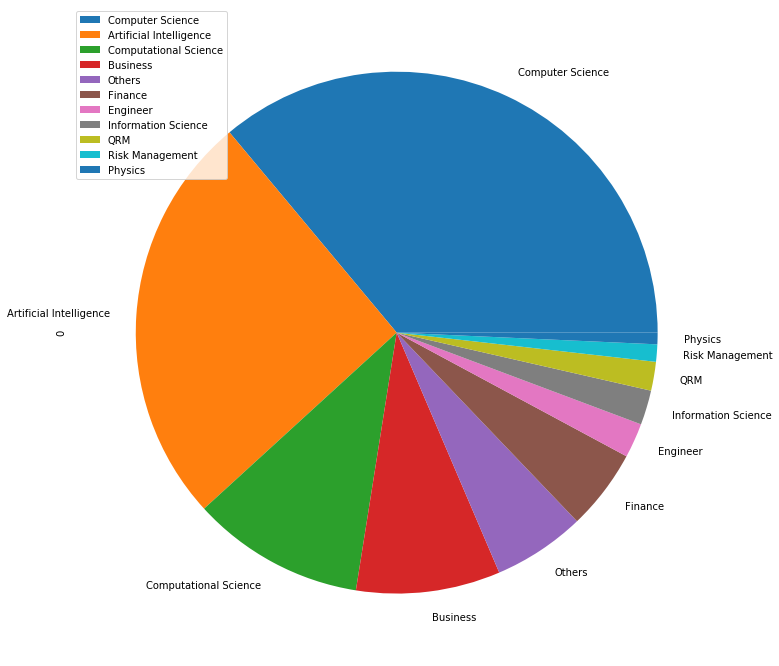

In [100]:
# draw for the previous values
# first for the prog
# raw_data.plot.pie(y='prog')
tmpd = dict(raw_data['prog'].value_counts())
print(restore_data['prog'][raw_data['prog']=='Others'])
# print(tmpd)
tmpdf = pd.DataFrame(tmpd.values(), index=tmpd.keys())
tmpdf.plot.pie(subplots=True, figsize=(12,12))
plt.legend(loc='upper left')
del tmpd, tmpdf

In [59]:
#find a heatmap upon the opinions to choco and sex
# print(raw_data['choco'].corr(raw_data['gender']))
def ExtractNumber(item):
    if isinstance(item, float):
        num = item
    elif isinstance(item, int):
        num = float(item)
    elif isinstance(item, str):
        nstr = re.findall(r'\d+\.?\d*', item)
        nlist = list(map(float,nstr))
        if len(nlist) == 0:
            num = float('NaN')
        else:
            num = nlist[0]
    else:
        num = float('NaN')
    return num


In [66]:

raw_data['nNeigh'] = raw_data['nNeigh'].map(ExtractNumber)
raw_data['dm'] = raw_data['dm'].map(ExtractNumber)
raw_data['stress'] = restore_data['stress'].map(ExtractNumber)

In [74]:
def bedtime(s):
    if type(s)==str:
        cands = re.findall(r"^([0-1][0-9]|[2][0-3]):([0-5][0-9])$", s)
        if (len(cands)):
            return cands[0]
    return ('00', '00')

raw_data['bed'] = restore_data['bed'].map(bedtime)

In [75]:
raw_data['bed'][0]

('22', '30')

In [81]:
# dt_re = r"^\d{4}\-(0?[1-9]|1[012])\-(0?[1-9]|[12][0-9]|3[01])$"
def birthday(s):
    if type(s)==str:
        cands = re.findall(dt_re, s)
        print(cands)
        if (len(cands)):
            return cands[0]
    return ('00', '00')
# raw_data['birthday'] = restore_data['birthday'].map(birthday)

In [76]:
def InvalidValue(minv, maxv, item):
    if item < minv or item > maxv:
        item = float('NaN')
    return item
raw_data['dm'] = raw_data['dm'].map(lambda x: InvalidValue(0, 100, x))
raw_data['nNeigh'] = raw_data['nNeigh'].map(lambda x: InvalidValue(0, 10, x))

In [101]:
majors = sorted(set(raw_data['prog']))
reverse_mj = {n:i for i, n in enumerate(majors)}
tmp = np.zeros((len(raw_data['prog']), len(majors)), dtype='int32')
for i in range(len(tmp)):
    tmp[i][reverse_mj[raw_data['prog'][i]]] = 1
tmp_df = pd.DataFrame(tmp, columns = list(majors))
# print(tmp_df)
tmp_df.to_csv('../data/ODI_pro.csv', index=False, encoding='utf-8')

del tmp, reverse_mj, tmp_df

In [102]:
print(majors)

['Artificial Intelligence', 'Business', 'Computational Science', 'Computer Science', 'Engineer', 'Finance', 'Information Science', 'Others', 'Physics', 'QRM', 'Risk Management']
